# Investigating Fandango Movie Ratings

## Introduction:

## Background Context:

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this article — a great piece of data journalism that's totally worth reading.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

The two distributions above are displayed using a simple line plot, which is also a valid way to show the shape of a distribution. The variable being examined is movie rating, and for each unique rating we can see its relative frequency (percentage) on the y-axis of the graph. When an analysis report is intended for large audiences, relative frequencies (especially percentages) are preferred over absolute frequencies.

Both distributions above are strongly left skewed, suggesting that movie ratings on Fandango are generally high or very high. We can see there's no rating under 2 stars in the sample Hickey analyzed. The distribution of displayed ratings is clearly shifted to the right compared to the actual rating distribution, suggesting strongly that Fandango inflates the ratings under the hood.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

## Goal:

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

# Part 1: Opening Data and Exploring

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. Fortunately, we have ready-made data for both these periods of time

In [1]:
import pandas as pd

# read data in
hickeydataraw = pd.read_csv('fandango_score_comparison.csv')
hickeydataraw.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
# read data in
fandango_after_hickeydata = pd.read_csv('movie_ratings_16_17.csv')
fandango_after_hickeydata.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [3]:
# isolating useful columns from our dataframes
before = hickeydataraw[['FILM','Fandango_Stars',
                        'Fandango_Ratingvalue','Fandango_votes',
                        'Fandango_Difference']]
after = fandango_after_hickeydata[['movie','year','fandango']]

Our goal is to determine whther there has bene any change in Fandango's rating system after Hickey's analysis.

So the population we want to infer on is Fandango's rating system for **ALL** movies. However, this sample only contains data from Fandango's system for films at least 30 fan reviews on Fandango. This is not a random selection, but a chosen selection. 

Therefore the sample data we have is not representative of the population we want to answer questions on and we are likely to incur sampling error or draw conclusions that are not representative.

Because of this we can either collect new data or pivot to a new goal.
Let's try the latter option:

## New Goal:

Determine if there has been any change in Fandango's rating system for films with real fan reviews, i.e popular Fandango movies in 2015 and 2016. 

Now we have two populations we can describe and comapre with each other:
- All Fandango's ratings for popular movies released in 2015
- All Fandango's ratings for popular movies released in 2016

_We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website._

# Part 2: Evaluating Samples for New goal

In [4]:
#check if both samples contain popular movies, 
# whether all (or at least most) sample points are moviews wiht over 30 fan ratings

percentage_pop_films_before = (before['Fandango_votes']>30).count()/before.shape[0]
percentage_pop_films_before

1.0

All movies in this dataset have more than 30 Fandango ratings. This sample is representative.

In [5]:
after.sample(10,random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


|Movie|Fan ratings|
|-----|----------|
|Mechanic: Resurrection|2247|
|Warcraft|7271|
|Max Steel|493|
|Me Before You|5263|
|Fantastic Beasts and Where to Find Them|13400|
|Cell|17|
|Genius|127|
|Sully|11877|
|A Hologram for the King|500|
|Captain America: Civil War|35057|

The movies in the dataset after hickey's analysis are also representative, majority of films have over 30 Fandango ratings.

Looking at the dataset, we see there are films in it that were not released in 2015 and 2016.

## Part 2.5: Seperating data by year

In [6]:
before['year'] = before['FILM'].str[-5:-1].astype(int)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
fandango_2015 = before.loc[before['year']==2015,:].copy()
fandango_2016 = after.loc[after['year']==2016,:].copy()

# Part 3: Plotting The Data & Evaluating Differences

Lets plot the density of values to see how 2015 vs 2016 compares.

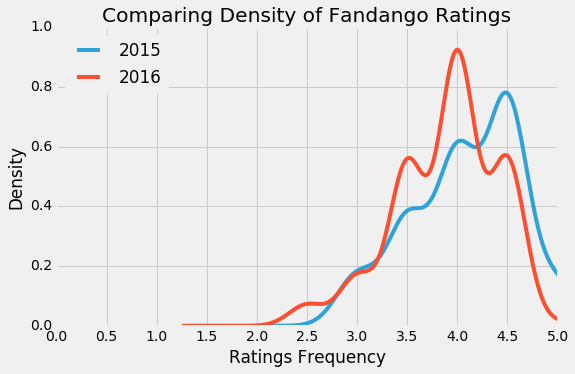

In [26]:
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label='2015',
                                         legend=True,figsize=(8,5))
fandango_2016['fandango'].plot.kde(label='2016',legend=True,figsize=(8,5))
plt.title('Comparing Density of Fandango Ratings')
plt.xlabel('Ratings Frequency')
plt.ylabel('Density')
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlim(0,5)
plt.show()

Both year showcase a negative, or left-skewed shape. Majority of Ratings are above the 3.0 hit point on the scale.

2015 has a central value of 4.5. 2016 has a central value of 4.0

From the graph above we can see there is a change in how ratings are captured year over year; in 2016 films are rated slightly lower compared 2015.

Lets take a granluar look by generating frequency tables:

### Absolute Frequencies:

In [27]:
fandango_2015['Fandango_Stars'].value_counts(ascending=False).sort_index()

3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [28]:
fandango_2016['fandango'].value_counts(ascending=False).sort_index()

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

### Relative Frequencies:
(Percentages) 

In [41]:
fandango_2015['Fandango_Stars'].value_counts(normalize=True,
                                             ascending=False).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [42]:
fandango_2016['fandango'].value_counts(normalize=True,
                                             ascending=False).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

The frequency tables provide more distinct understanding, 40 percent of ratings for 2016 were 4.0 vs 28 percent in 2015; 12 point difference.

Biggest difference between the two years is that the majority of ratings are 4.0 in 2016. When looking at the relative frequency the direction of the data is not as clear however, because almost forty percent of values in 2015 account for 4.5 rating. 

# Part 4: Summary Statistics

We confirmed with the two tables before that there is indeed a clear difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel density plot.

We'll take a couple of summary statistics (remember the distinction between sample statistics and population parameters) to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [76]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 =fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summarystats = pd.DataFrame()
summarystats['2015'] = [mean_2015,median_2015,mode_2015]
summarystats['2016'] =[mean_2016,median_2016,mode_2016]
summarystats.set_axis(['mean','median','mode'],inplace=True)

In [77]:
summarystats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


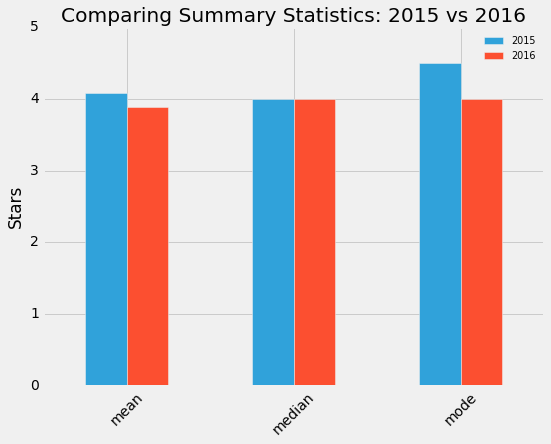

In [106]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

# fandango_2015['Fandango_Stars'].plot.kde(label='2015',
#                                          legend=True,figsize=(8,5))
# fandango_2016['fandango'].plot.kde(label='2016',legend=True,figsize=(8,5))
# plt.title('Comparing Density of Fandango Ratings')
# plt.xlabel('Ratings Frequency')
# plt.ylabel('Density')
# plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
# plt.xlim(0,5)
# plt.show()
summarystats.plot.bar(figsize=(8,6))
plt.title('Comparing Summary Statistics: 2015 vs 2016')
plt.ylabel('Stars')
plt.xticks(rotation=45)
plt.ylim(0.0,5.0)
plt.legend(loc=1,fontsize='x-small')
plt.show()

# Conclusion:

From our analysis above we can see that ratings for 2016 vs 2015, are slightly lower. Statistically there is a not a major difference but we can see the relative frequency for 2016 is much higher at a 4.0 star rating. 
The mean and mode are slightly higher for 2015 vs 2016, further concluding our point of the slight difference in lower ratings year over year comparison.

We are not sure what exactly caused this difference but can assume Fandango tweaked their algorithm.